<a href="https://colab.research.google.com/github/AurelioGuilherme/DNC_projetos/blob/main/Regression_and_Clustering_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJETO DE REGRESSÃO


## 1 - Importação de bibliotecas | Import libraries

In [221]:
# Data wrangling e data cleaning
import pandas as pd
import numpy as np

# Dataviz
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='pastel',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

In [223]:
def valuesPlot(plot):
  for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=12,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points');

## 2 - Contextualização


**Objetivo:** O projeto tem como propósito a criação de uma solução de Data Science para a empresa Acerola Segurity.SA (empresa fictícia) que atua no ramo de seguros. A empresa procurou-me pois quer entender, estudar e se possível melhorar seus preços dos seguros.

Também foi solicitado a análise da influência do sexo no custo do seguro, pois a empresa pretende incluir uma campanha direcionada ao público feminino e assim promover mais diversidade e acesso a este público

Inicialmente implementaremos um modelo não supervisionado de Clusterização para criar grupos e avaliar melhor os clientes, trazendo insights para o time de inovação da empresa.

Também implementaremos um modelo supervisionado de Machine Learning para prever os valores de seguro.

### Features iniciais | RAWDATA features

O conjunto de dados possui 1341 linhas e 7 colunas:

* idade: idade do cliente (min:18 / max: 64)
* Sexo: Variável categórica correspondente ao genero do cliente (Homem / mulher)
* imc: Índice de Massa Corpórea
* quantidade_filhos: Quantidade de filhos (min: 0 / max: 5)
* fumante: Variável categórica corresponde se o cliente é fumante (yes / no)
* regiao: Variável categorica correspondente a localidade onde o cliete reside.
* custos_seguro: Corresponde o custo do seguro do cliente

In [224]:
df = pd.read_excel('/content/insurance.xlsx')

In [225]:
df.head()

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.560,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3 -  Data Wrangling and Data cleaning

In [226]:
df.shape

(1341, 7)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idade              1341 non-null   int64  
 1   sexo               1338 non-null   object 
 2   imc                1341 non-null   float64
 3   quantidade_filhos  1341 non-null   int64  
 4   fumante            1341 non-null   object 
 5   regiao             1341 non-null   object 
 6   custos_seguro      1341 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.5+ KB


### Identificando e removendo valores nulos.

Percebe-se que existem valores nulos na coluna sexo.

In [228]:
df.isna().sum()

idade                0
sexo                 3
imc                  0
quantidade_filhos    0
fumante              0
regiao               0
custos_seguro        0
dtype: int64

Identificando os valores nulos percebe-se que são valores idênticos e com custos de seguro igual a 0, portanto decidi por remove-los do conjunto de dados devido a serem valores incorretos que ocasionariam problemas com o modelo de regressão.

In [229]:
df.query('sexo != "male" & sexo !="female"')

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
1259,30,NaN,40.09,0,no,northeast,0.0
1285,30,NaN,40.09,0,no,northeast,0.0
1331,30,NaN,40.09,0,no,northeast,0.0


In [230]:
df.query('custos_seguro == 0')

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
1259,30,NaN,40.09,0,no,northeast,0.0
1285,30,NaN,40.09,0,no,northeast,0.0
1331,30,NaN,40.09,0,no,northeast,0.0


In [231]:
df = df.dropna().reset_index(drop=True)

### Identificando e removendo valores duplicados.

Existe somente um valor duplicado, porem para evitar problemas na etapa de modeling decidi por remove-lo previamente.

In [232]:
df.duplicated().sum()

1

In [233]:
df = df.drop_duplicates().reset_index(drop=True)

## 4 - EDA

In [234]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
idade,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
imc,1337.0,30.663871,6.100648,15.9600,26.290,30.4000,34.70000,53.13000
quantidade_filhos,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
custos_seguro,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [235]:
df

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.560,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


### Análise gráfica 

- Idade

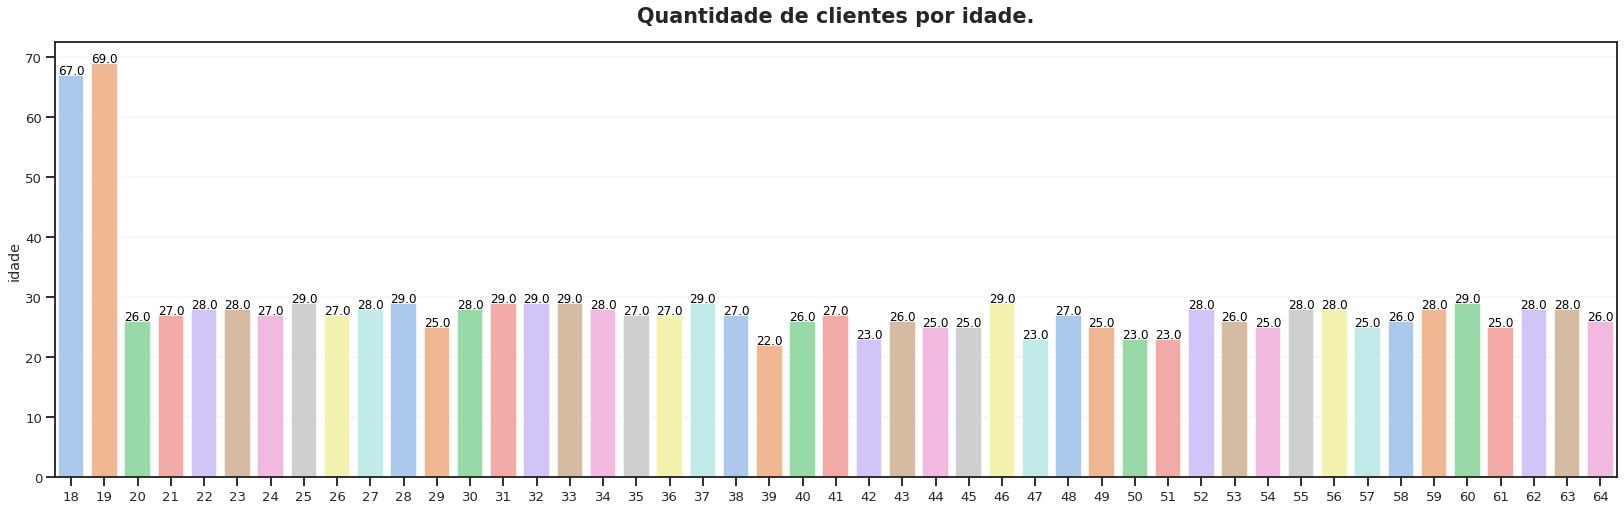

In [236]:
plt.figure(figsize=(28,8))
plt.title('Quantidade de clientes por idade.')
plot = sns.barplot(data = df, x=df.idade.unique(), y= df.idade.value_counts(), palette=("pastel"))
valuesPlot(plot)

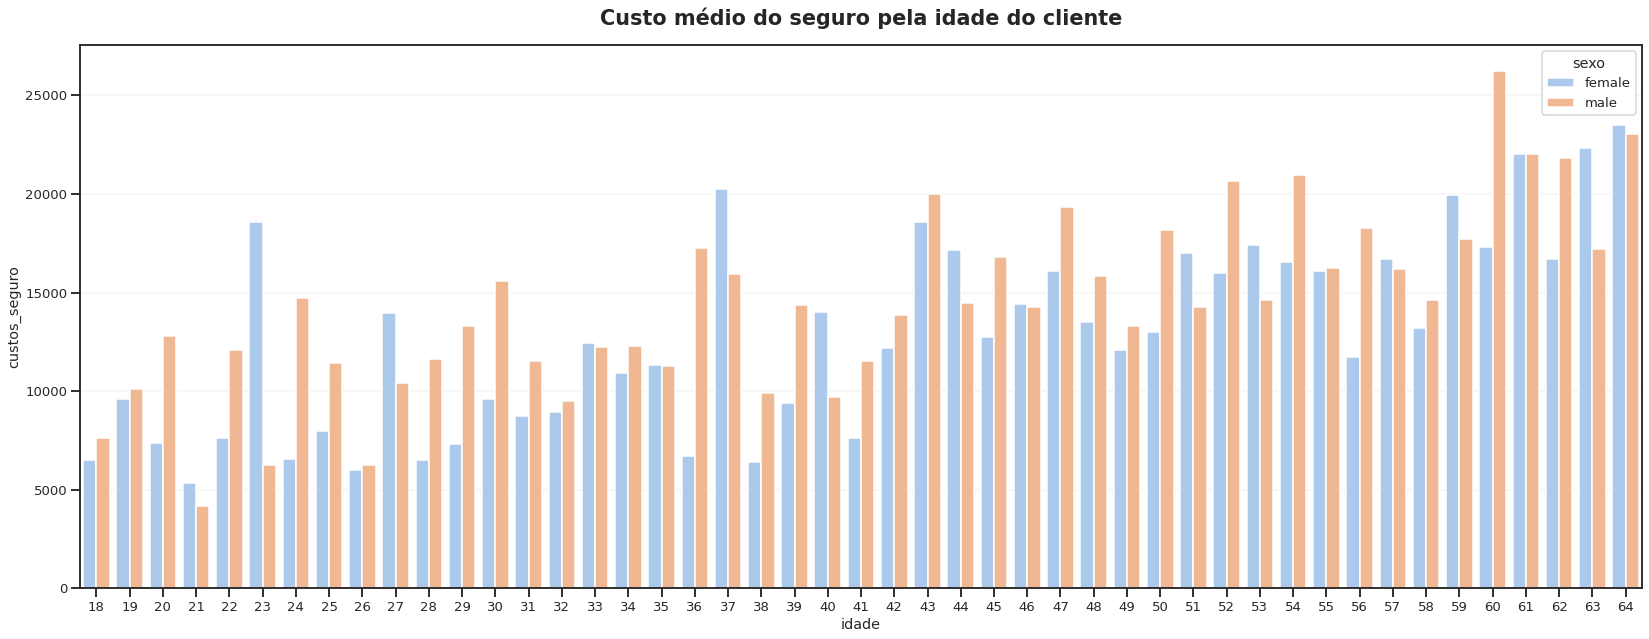

In [252]:
prov = df.groupby(['idade','sexo'])[['custos_seguro']]\
         .mean()\
         .round()\
         .reset_index()


plt.figure(figsize = (28,10))
plt.title('Custo médio do seguro pela idade do cliente')
sns.barplot(data = prov, 
            x = 'idade', 
            y = 'custos_seguro',
            hue = 'sexo'
            );

- Sexo

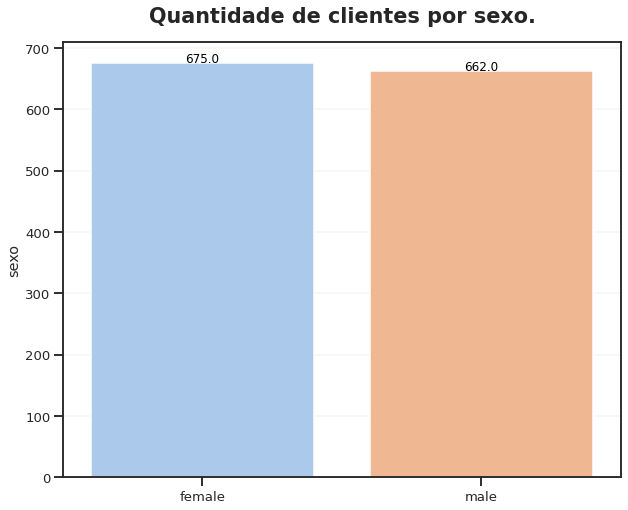

In [253]:
plt.figure(figsize=(10,8))
plt.title('Quantidade de clientes por sexo.')
plot = sns.barplot(data = df, x=df.sexo.unique(), y= df.sexo.value_counts(), palette=("pastel"))
valuesPlot(plot)

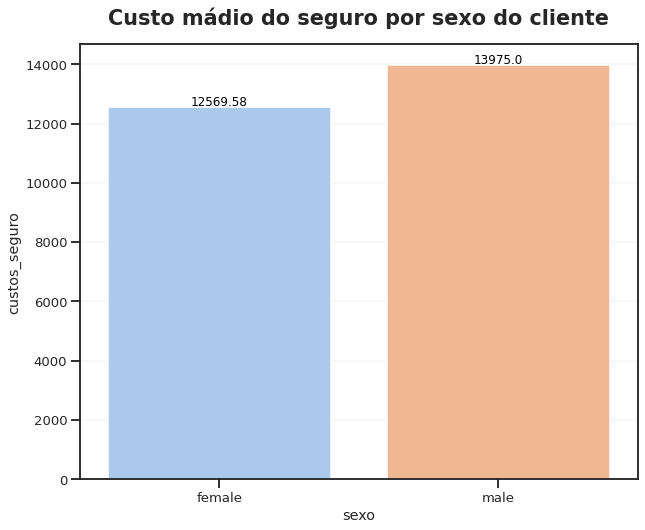

In [259]:
prov = df.groupby('sexo')[['custos_seguro']]\
         .mean()\
         .round(2)\
         .reset_index()
plt.figure(figsize = (10,8))
plt.title('Custo mádio do seguro por sexo do cliente')
plot = sns.barplot(data = prov, 
                   x = 'sexo', 
                   y ='custos_seguro')
valuesPlot(plot)

- Fumante

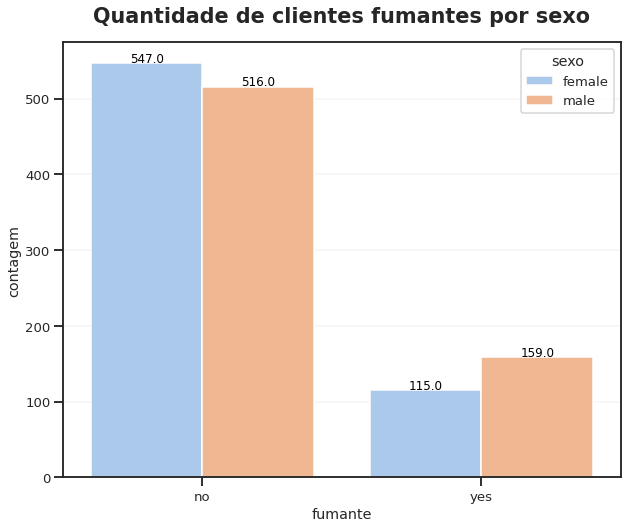

In [255]:
prov = df.groupby(['fumante', 'sexo'])[['fumante']]\
         .count()\
         .rename(columns = {'fumante': 'contagem'})\
         .reset_index()
  

plt.figure(figsize=(10,8))

plt.title('Quantidade de clientes fumantes por sexo')
plot = sns.barplot(data = prov,
                   x= 'fumante', 
                   y= 'contagem', 
                   hue = 'sexo',
                   palette=("pastel"))
valuesPlot(plot)

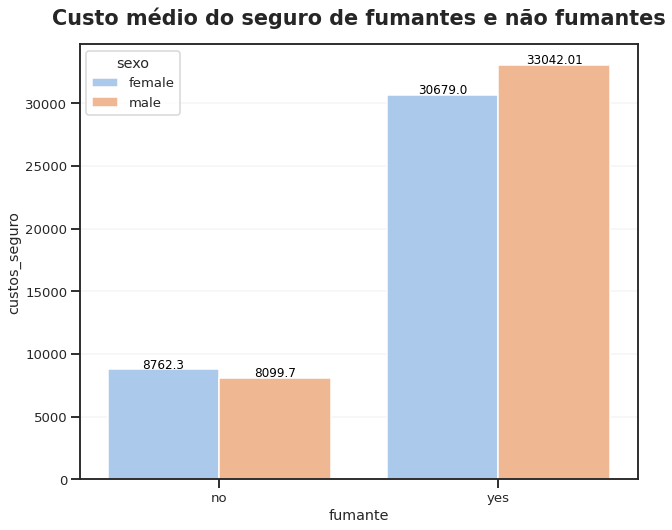

In [258]:
prov = df.groupby(['fumante','sexo'])[['custos_seguro']]\
         .mean()\
         .round(2)\
         .reset_index()

plt.figure(figsize = (10,8))
plt.title('Custo médio do seguro de fumantes e não fumantes')
plot = sns.barplot(data = prov, 
             x = 'fumante', 
             y = 'custos_seguro',
             hue = 'sexo');
valuesPlot(plot)

- Filhos

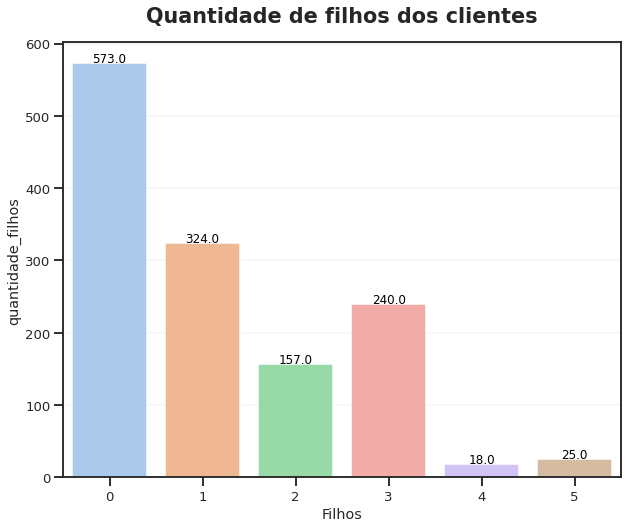

In [257]:
plt.figure(figsize=(10,8))
plt.title('Quantidade de filhos dos clientes')
plot = sns.barplot(data = df, 
                   x=df.quantidade_filhos.unique(), 
                   y= df.quantidade_filhos.value_counts(), 
                   palette=("pastel"))
plt.xlabel('Filhos')
valuesPlot(plot)

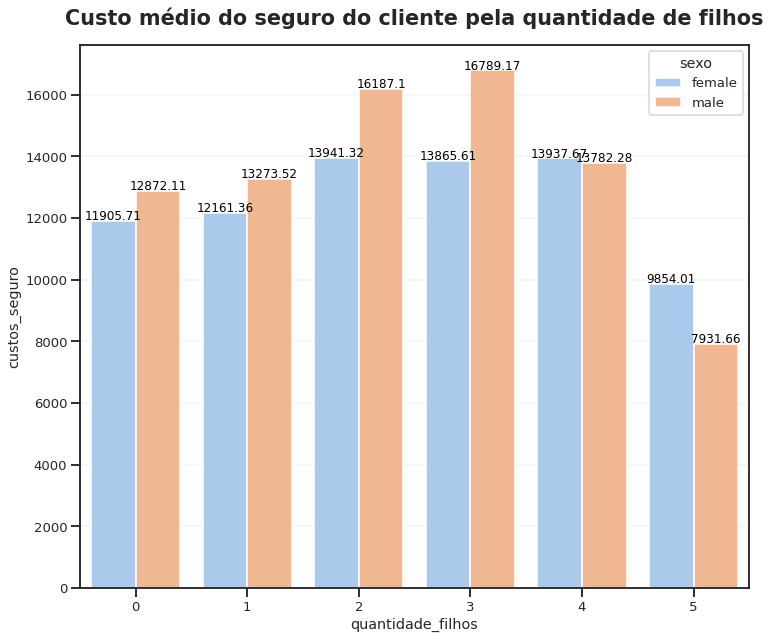

In [245]:
prov = df.groupby(['quantidade_filhos', 'sexo'])[['custos_seguro']]\
         .mean()\
         .round(2)\
         .reset_index()

plt.figure(figsize = (12,10))         
plt.title('Custo médio do seguro do cliente pela quantidade de filhos')         
plot = sns.barplot(data = prov,
                    x = 'quantidade_filhos', 
                    y = 'custos_seguro',
                    hue = 'sexo');
valuesPlot(plot)



- Região

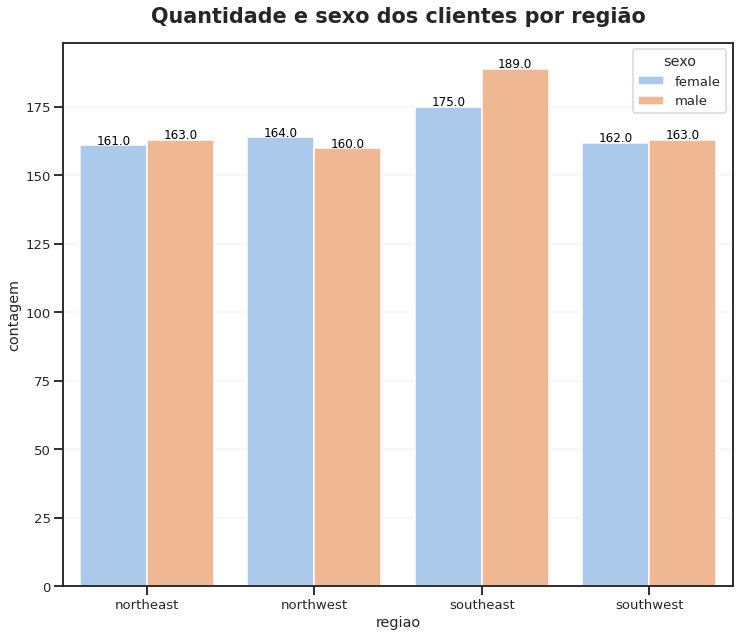

In [240]:
prov = df.groupby(['regiao','sexo'])[['sexo']].count()\
         .rename(columns = {'sexo': 'contagem'})\
         .reset_index()

plt.figure(figsize=(12,10))
plt.title('Quantidade e sexo dos clientes por região')
plot = sns.barplot(data = prov, 
                   x='regiao', 
                   y= 'contagem', 
                   hue = 'sexo',
                   palette=("pastel"))
valuesPlot(plot)


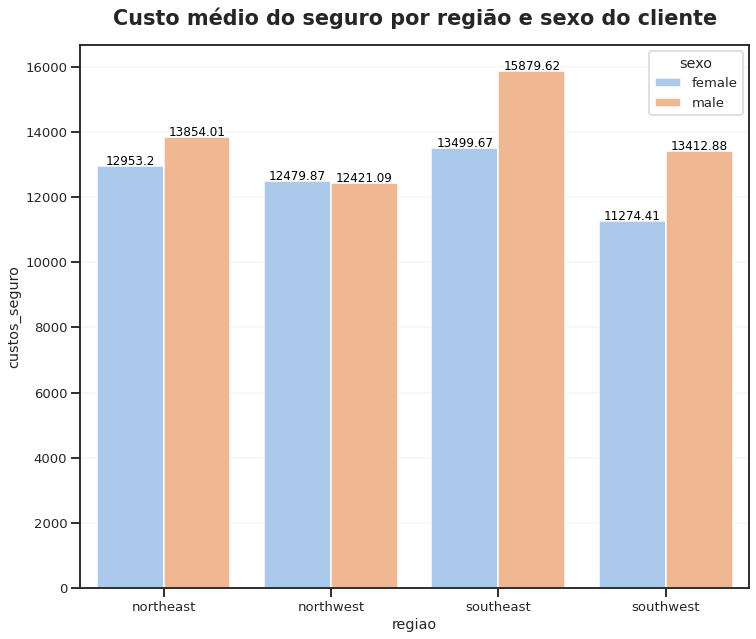

In [244]:
prov = df.groupby(['regiao','sexo'])[['custos_seguro']]\
         .mean()\
         .round(2)\
         .reset_index()
         
plt.figure(figsize = (12,10))
plt.title("Custo médio do seguro por região e sexo do cliente")
plot = sns.barplot(data = prov, 
                   x = 'regiao', 
                   y = 'custos_seguro',
                   hue = 'sexo');
valuesPlot(plot)

- IMC

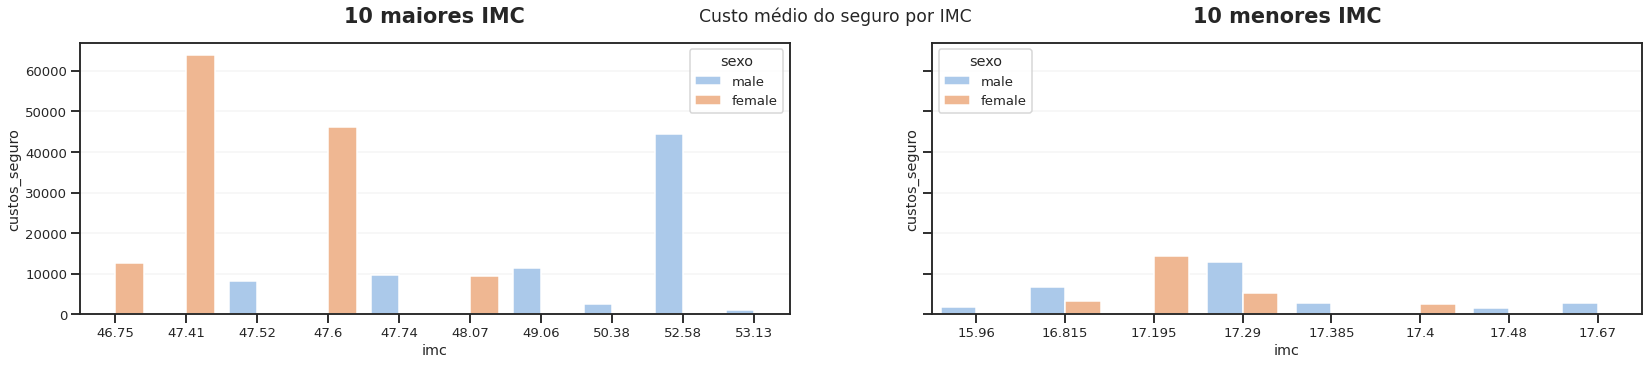

In [246]:
prov = df.groupby(['imc','sexo'])[['custos_seguro']]\
         .mean()\
         .reset_index()\
         .sort_values(by = 'imc', ascending = False)\
         .head(10)
prov2 = df.groupby(['imc','sexo'])[['custos_seguro']]\
          .mean()\
          .reset_index()\
          .sort_values(by = 'imc', ascending = False)\
          .tail(10)


fig, axes = plt.subplots(1, 2, figsize=(28, 5), sharey=True)
fig.suptitle('Custo médio do seguro por IMC')

plot = sns.barplot(ax=axes[0],
                   data = prov,
                   x = 'imc',
                   y = 'custos_seguro',
                   hue = 'sexo')
axes[0].set_title('10 maiores IMC')

plot2 = sns.barplot(ax=axes[1],
                   data = prov2,
                   x = 'imc',
                   y = 'custos_seguro',
                   hue = 'sexo')
axes[1].set_title('10 menores IMC')



plt.show()

## 5 - Distribuição e análise de outliers

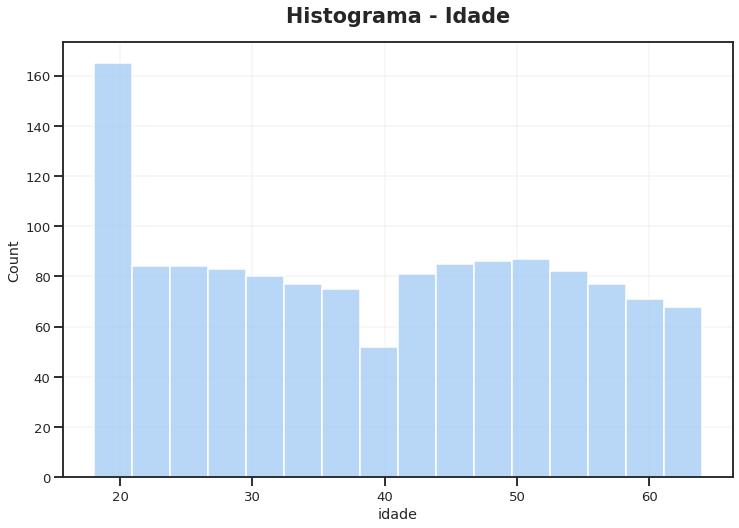

In [281]:
plot = sns.histplot(df.idade, bins = 16)\
          .set_title('Histograma - Idade')

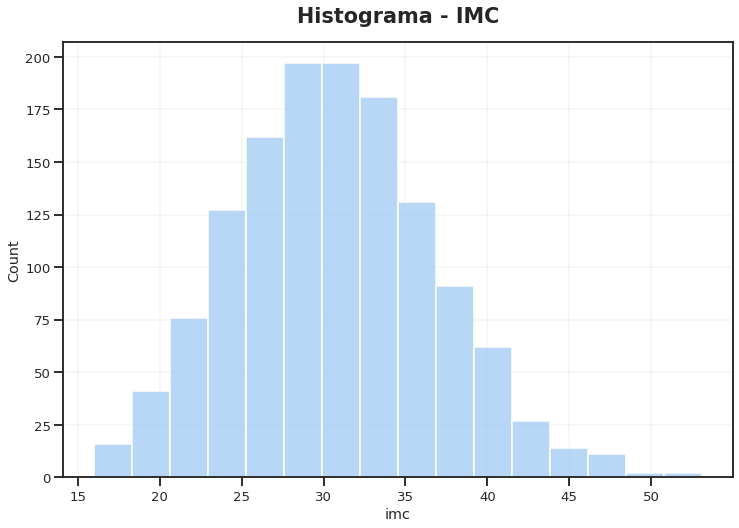

In [282]:
plot = sns.histplot(df.imc, bins = 16)\
          .set_title('Histograma - IMC')

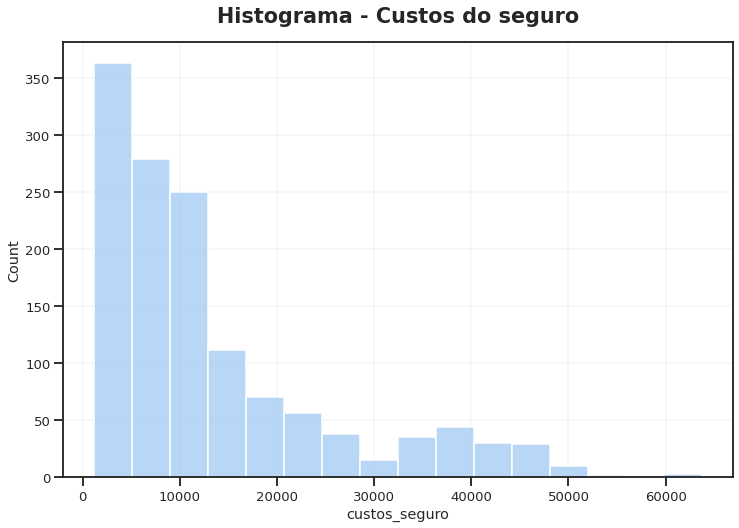

In [283]:
plot = sns.histplot(df.custos_seguro, bins = 16)\
          .set_title('Histograma - Custos do seguro')


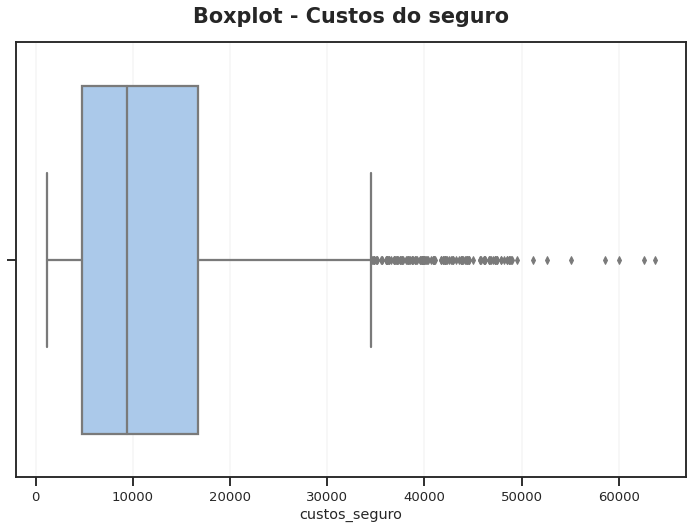

In [284]:
plot = sns.boxplot(data = df, x = df.custos_seguro)\
          .set_title('Boxplot - Custos do seguro')

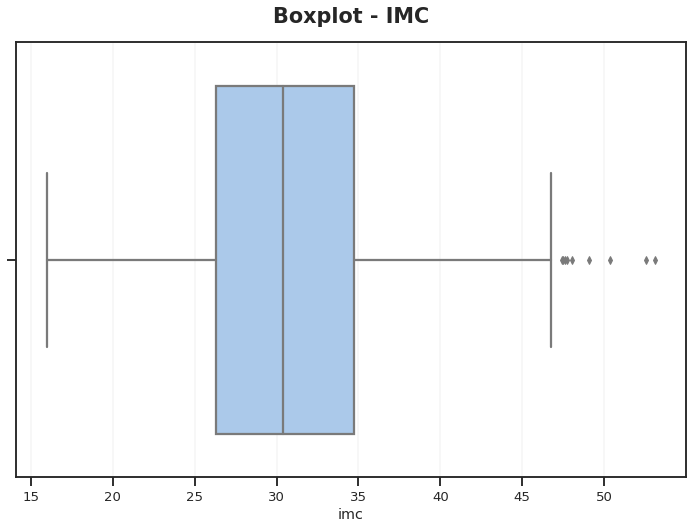

In [285]:
plot = sns.boxplot(data = df, x = df.imc)\
          .set_title('Boxplot - IMC')

* criar feature referente a faixa etaria:
** 18 |-- 25
** 25 |-- 40
** 40 |-- 55
** 55+

Faixa etária é a divisão da população de determinada sociedade por geração de acordo com a época em que nasceram, ou seja, é uma distribuição de acordo com as idades. Tradicionalmente, uma população é dividida em três faixas etárias:

Jovens - Indivíduos de até 19 anos;
Adultos - Indivíduos com idade entre 20 até 59 anos;
Idosos - Indivíduos de 60 anos em diante.

* criar feature com o imc identificando se o individuo está acima do peso

* gerar analise atraves de um pipeline de tratamento.


* apos o final da analise gerar novo dataframe com dados sinteticos limitados ao range do rawdataset 
